# Global Optimization (SHGO)

SHGO stands for Simplicial Homology Global Optimization.

In [1]:
from optiland import optic, optimization

Define a starting lens:

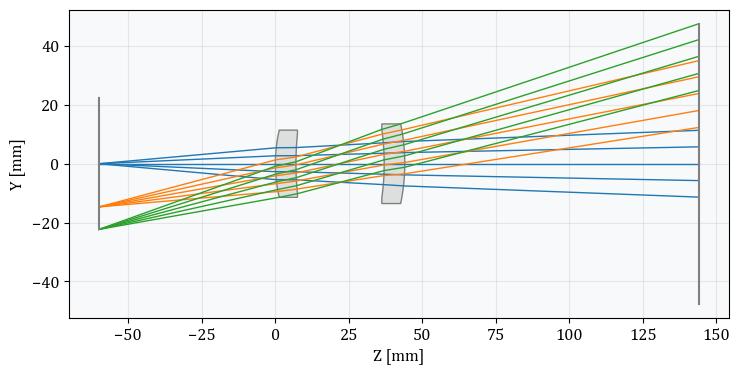

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=60)
lens.add_surface(index=1, thickness=7, radius=50, material="N-SF2")
lens.add_surface(index=2, thickness=15, radius=100)
lens.add_surface(index=3, thickness=15, is_stop=True)
lens.add_surface(index=4, thickness=7, radius=-85, material="BK7")
lens.add_surface(index=5, thickness=100, radius=-66)
lens.add_surface(index=6)

# set aperture
lens.set_aperture(aperture_type="EPD", value=15)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)
lens.add_field(y=10)
lens.add_field(y=15)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [ ]:
# RMS spot size target
for field in lens.fields.get_field_coords():
    input_data = {
        "optic": lens,
        "Hx": field[0],
        "Hy": field[1],
        "surface_number": -1,
        "num_rays": 5,
        "wavelength": 0.55,
        "distribution": "hexapolar",
    }
    problem.add_operand(
        operand_type="rms_spot_size",
        target=0,
        weight=1,
        input_data=input_data,
    )

Define variables - let both radii of curvature of the last lens vary.

In [ ]:
for surf_idx in [4, 5]:
    problem.add_variable(
        lens,
        "radius",
        surface_number=surf_idx,
        min_val=-1000,
        max_val=1000,
    )

Check initial merit function value and system properties:

In [6]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                229.884 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │   Target │ Min. Bound   │ Max. Bound   │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ rms spot size  │        0 │              │              │        1 │   8.777 │   8.777 │          33.51 │
│  1 │ rms spot size  │        0 │              │              │        1 │   8.754 │   8.754 │          33.34 │
│  2 │ rms spot size  │        0 │              │              │        1 │   8.73  │   8.73  │          33.16 │
╘════╧════════════════╧══════════╧══════════════╧═════════════

Define optimizer:

In [7]:
optimizer = optimization.SHGO(problem)

Run optimization:

In [8]:
optimizer.optimize(workers=-1)  # workers=-1 uses all available cores

 message: Optimization terminated successfully.
 success: True
     fun: 0.1472372939596464
    funl: [ 1.472e-01]
       x: [ 9.000e+00 -1.323e+00]
      xl: [[ 9.000e+00 -1.323e+00]]
     nit: 1
    nfev: 249
   nlfev: 244
   nljev: 71
   nlhev: 0

Print merit function value and system properties after optimization:

In [9]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │               0.147237 │            99.936 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │   Target │ Min. Bound   │ Max. Bound   │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ rms spot size  │        0 │              │              │        1 │   0.248 │   0.248 │          41.83 │
│  1 │ rms spot size  │        0 │              │              │        1 │   0.117 │   0.117 │           9.23 │
│  2 │ rms spot size  │        0 │              │              │        1 │   0.268 │   0.268 │          48.94 │
╘════╧════════════════╧══════════╧══════════════╧═════════════

Draw final lens:

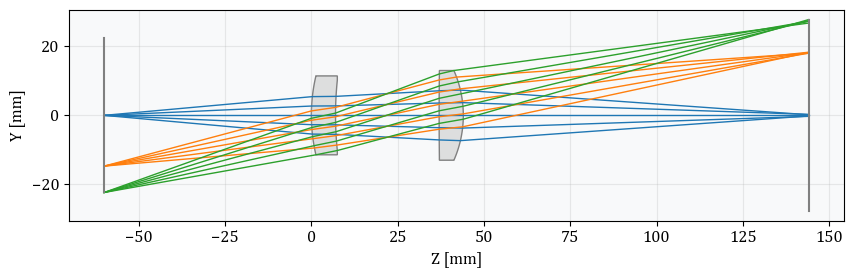

In [10]:
lens.draw(num_rays=5)